In [1]:
import pandas as pd
import string

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train # Traning dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
test # Test data set

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [6]:
train_original=train.copy()
test_original=test.copy()

In [7]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [8]:
import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
combine=train.append(test,ignore_index=True,sort=True)

C:\Users\surya\AppData\Local\Temp\ipykernel_7616\1936391023.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine=train.append(test,ignore_index=True,sort=True)


In [10]:
combine.shape

(49159, 3)

In [11]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [12]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


# Removing Twitter Handles (@user)

In [13]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r=re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text=re.sub(i,"",text)
    return text

In [14]:
import numpy as np
import re

In [15]:
# vectorize function like the python map function
combine['Tidy_Tweets']=np.vectorize(remove_pattern)(combine['tweet'],"@[\w]*")
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


# Removing Punctuations, Numbers, and Special Characters

In [16]:
combine['Tidy_Tweets']=combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]"," ")

C:\Users\surya\AppData\Local\Temp\ipykernel_7616\1930199537.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets']=combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]"," ")


In [17]:
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


# Removing Short Words

In [18]:
combine['Tidy_Tweets']=combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


# Tokenization

In [19]:
tokenized_tweet=combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

# Stemming

In [20]:
from nltk import PorterStemmer

In [21]:
ps=PorterStemmer()

In [22]:
tokenized_tweet=tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
combine['Tidy_Tweets']=tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Visualization from Tweets

In [24]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# ALL Positive words

In [25]:
all_words_positive=' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

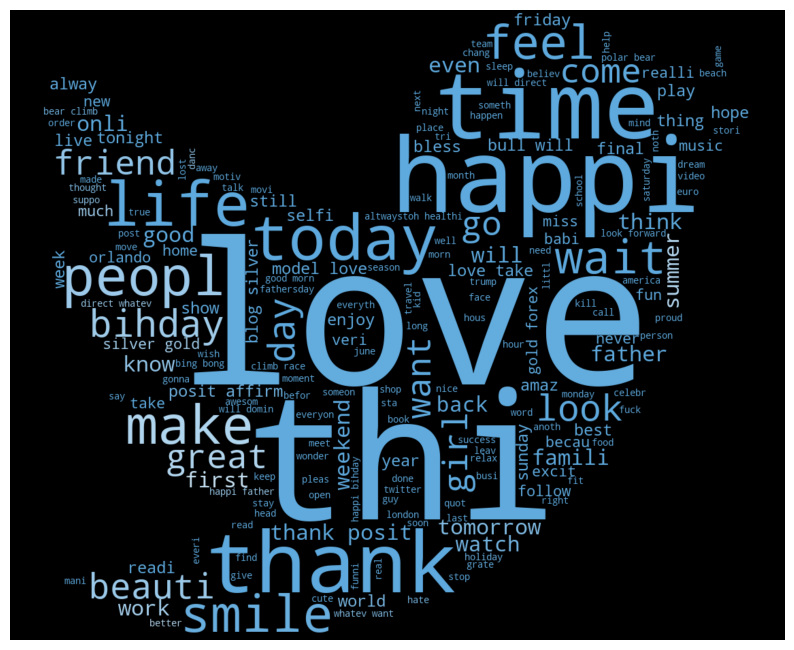

In [26]:
# combining the image with the dataset
Mask=np.array(Image.open('Twitter-PNG-Image.png'))
# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors=ImageColorGenerator(Mask)
# Now we use the WordCloud function from the wordcloud library 
wc=WordCloud(background_color='black',height=1500,width=4000,mask=Mask).generate(all_words_positive)
# Size of the image generated 
plt.figure(figsize=(10,20))
# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

# All negative words

In [27]:
all_words_negative= ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

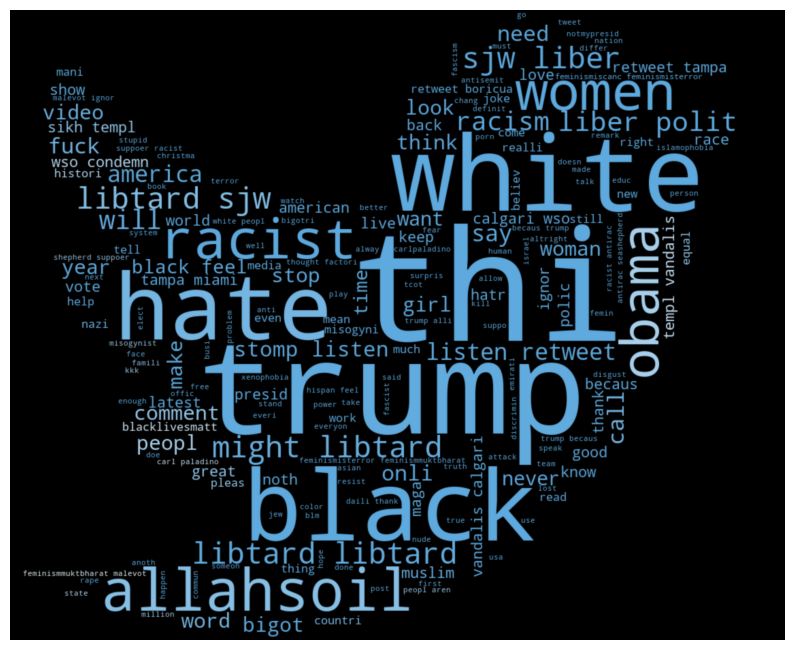

In [28]:
# combining the image with the dataset
Mask=np.array(Image.open('Twitter-PNG-Image.png'))
# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors=ImageColorGenerator(Mask)
# Now we use the WordCloud function from the wordcloud library 
wc=WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)
# Size of the image generated 
plt.figure(figsize=(10,20))
# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")
plt.axis('off')
plt.show()

# Function to extract hashtags from tweets

In [29]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht=re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [30]:
ht_positive=Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

In [31]:
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [35]:
ht_positive_unnest=sum(ht_positive,[])

In [36]:
ht_positive_unnest

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [37]:
ht_negative=Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [38]:
ht_negative_unnest=sum(ht_negative,[])

In [39]:
import nltk

# For Positive Tweets in the dataset

In [40]:
word_freq_positive=nltk.FreqDist(ht_positive_unnest)
word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [41]:
df_positive=pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [42]:
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


# Plotting the barplot for the 10 most frequent words used for hashtags

In [43]:
df_positive_plot=df_positive.nlargest(20,columns='Count') 

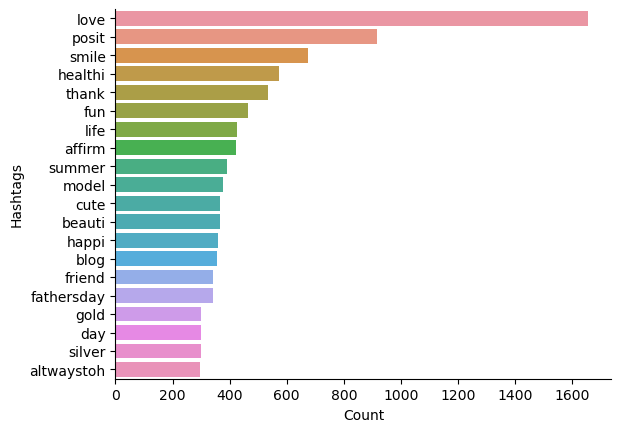

In [44]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

# For Negative Tweets in the dataset

In [45]:
word_freq_negative=nltk.FreqDist(ht_negative_unnest)

In [46]:
word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [47]:
df_negative=pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [48]:
df_negative

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1


In [49]:
df_negative_plot=df_negative.nlargest(20,columns='Count') 

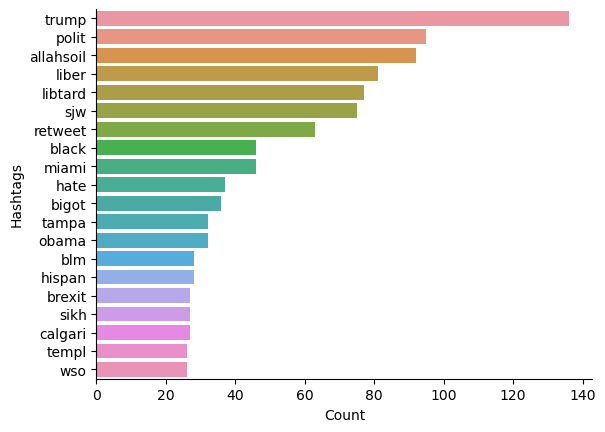

In [50]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# Extracting Features from cleaned Tweets¶
Bag-of-Words Features

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
# bag-of-words feature matrix
bow=bow_vectorizer.fit_transform(combine['Tidy_Tweets'])
df_bow=pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])
df_tfidf=pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Machine Learning Models

Using the features from Bag-of-Words Model for training set

In [53]:
train_bow=bow[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
train_tfidf_matrix=tfidf_matrix[:31962]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
from sklearn.model_selection import train_test_split

# Bag-of-Words Features

In [56]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow=train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

In [57]:
x_train_bow

<22373x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 87004 stored elements in Compressed Sparse Row format>

# Using TF-IDF features

In [58]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf=train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
Log_Reg=LogisticRegression(random_state=0,solver='lbfgs')

Using Bag-of-Words Features

In [61]:
# Fitting the Logistic Regression Model
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [62]:
prediction_bow=Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

Calculating the F1 score

In [63]:
from sklearn.metrics import f1_score

In [64]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int=prediction_bow[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
prediction_int
# calculating f1 score
log_bow=f1_score(y_valid_bow,prediction_int)
log_bow

0.5721352019785655

# Using TF-IDF Features

In [65]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [66]:
prediction_tfidf=Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

In [67]:
prediction_int=prediction_tfidf[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
prediction_int
# calculating f1 score
log_tfidf=f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.5862068965517241

# XGBoost

In [68]:
from xgboost import XGBClassifier

Using Bag-of-Words Features

In [69]:
model_bow=XGBClassifier(random_state=22,learning_rate=0.9)

In [70]:
model_bow.fit(x_train_bow,y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=22, ...)

In [71]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb=model_bow.predict_proba(x_valid_bow)
xgb

array([[9.9109417e-01, 8.9058345e-03],
       [9.9910688e-01, 8.9310389e-04],
       [9.2758572e-01, 7.2414286e-02],
       ...,
       [8.9067906e-01, 1.0932093e-01],
       [9.2758572e-01, 7.2414286e-02],
       [9.2758572e-01, 7.2414286e-02]], dtype=float32)

Calculating the F1 score

In [72]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3
# converting the results to integer type
xgb_int=xgb.astype(np.int)
# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)
xgb_bow

0.5811023622047244

# Using TF-IDF Features

In [73]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [74]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=29, ...)

In [75]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)
xgb_tfidf

array([[0.9958908 , 0.00410918],
       [0.9872918 , 0.01270822],
       [0.9527768 , 0.04722321],
       ...,
       [0.99192214, 0.00807783],
       [0.9852176 , 0.01478244],
       [0.9974108 , 0.0025892 ]], dtype=float32)

In [76]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3
# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)
# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)
score

0.5792

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dct = DecisionTreeClassifier(criterion='entropy',random_state=1)

In [79]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [80]:
dct_bow=dct.predict_proba(x_valid_bow)
dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [81]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3
# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)
# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)
dct_score_bow

0.5141776937618148

In [82]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [83]:
dct_tfidf=dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [84]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3
# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)
# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)
dct_score_tfidf

0.5498821681068342

# Model Comparison

In [85]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [86]:
score=[log_bow,xgb_bow,dct_score_bow,log_tfidf,score,dct_score_tfidf]
compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,7)])

In [87]:
compare.T

,1,2,3,4,5,6
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.572135,0.581102,0.514178,0.586207,0.5792,0.549882


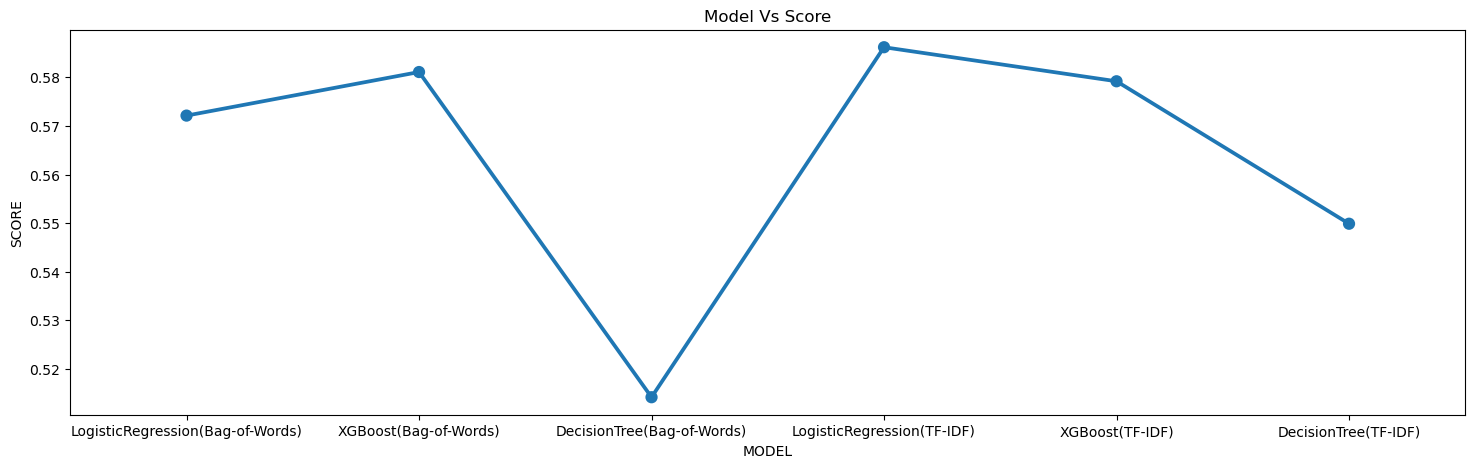

In [88]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='F1_Score',data=compare)
plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()

# Using the best possible model to predict for the test data

In [89]:
test_tfidf=tfidf_matrix[31962:]

In [ ]:
test_pred=Log_Reg.predict_proba(test_tfidf)

test_pred_int=test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)